# Exploring Pillow and imagedraw as a drawing package
Aim is to generate a drawing.  The building up to weaving by moddelling weft lines and adding worp.  Then adding harnesses to generate twill patterns

Will also create method for describing tartan


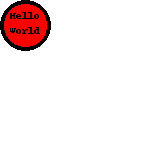

In [1]:
from PIL import Image, ImageDraw, ImageFont

# create an image
out = Image.new("RGB", (150, 150), (255, 255, 255))

d = ImageDraw.Draw(out)
d.ellipse( (0,0,50,50), fill=(255,0,0), outline=(0,0,0), width=4)

# draw multiline text
d.multiline_text((10, 10), "Hello\nWorld",  fill=(0, 0, 0)) #font=fnt,

out.show()

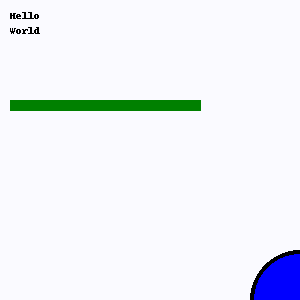

In [2]:
# Display default height of 300 and width 600
out = Image.new("RGB", (300, 300), (250, 250, 255))

d = ImageDraw.Draw(out)
d.ellipse( (250,250,350,350), fill="Blue", outline=(0,0,0), width=4)
d.rectangle( (10,100,200,110), fill="green", width=0)
# draw multiline text
d.multiline_text((10, 10), "Hello\nWorld",  fill=(0, 0, 0)) #font=fnt,

out.show()

In [3]:
drummond_tartan = (('R', 12),
          ('B', 2),
          ('R', 4),
          ('B', 4),
          ('R', 64),
          ('LB', 4),
          ('R', 4),
          ('B', 16),
          ('R', 4),
          ('G', 4),
          ('R', 4),
          ('G', 48),
          ('R', 4),
          ('B', 4),
          ('R', 12),
          )

In [4]:
test = "R14 DB2 R4 DB4 R70 LB4 R4 DB20 R4 G4 R4 G74 R6 DB4 R12"

In [5]:
import re

PATTERN = re.compile("([a-zA-Z]*)(\d*)")

def split_thread(threadcount):
    """Given a thread count such as R14, will split to R and integer 14"""
    match = re.search(PATTERN, threadcount)
    if match:
        return match.group(1),match.group(2)
    return threadcount,""
    

class Stripe:
    def __init__(self, short_colour, count):
        self.short_colour = short_colour
        self.count = int(count)

    def __str__(self):
        return f"{self.short_colour}{self.count}"

class Tartan:
    def __init__(self):
        self.stripes = []
        
    @classmethod
    def from_space_threadcount(cls, threadcount):
        tartan = cls()
        threads = threadcount.split(" ")
        for thread in threads:
            colour,count = split_thread(thread)
            tartan.stripes.append(Stripe(colour, count))
        return tartan

    def __str__(self):
        s= ""
        for stripe in self.stripes:
            s += f"{stripe} "
        return s

    @property
    def threadcount(self):
        tc = 0
        for stripe in self.stripes:
            tc += stripe.count
        return tc

    def create_generator(self):
        forwards = True
        index = 0
        while True:  # Change stripe
            stripe = self.stripes[index]
            for thread in range(stripe.count):
                yield stripe.short_colour
            # Implement symmetry of pattern
            if forwards:
                if index == len(self.stripes)-1:
                    forwards = False
                else:
                    index += 1
            else:
                if index == 0:
                    forwards = True
                else:
                    index -= 1

a = Tartan.from_space_threadcount(test)
print(f"Pattern = {a}")
print(f"Num threads = {a.threadcount}")

Pattern = R14 DB2 R4 DB4 R70 LB4 R4 DB20 R4 G4 R4 G74 R6 DB4 R12 
Num threads = 230


In [6]:
a = Tartan.from_space_threadcount(test)
my_gen = a.create_generator()
for i in range(20):
    colour = next(my_gen)
    if i > 11:
        print('the value number', i, 'is:', colour)

the value number 12 is: R
the value number 13 is: R
the value number 14 is: DB
the value number 15 is: DB
the value number 16 is: R
the value number 17 is: R
the value number 18 is: R
the value number 19 is: R


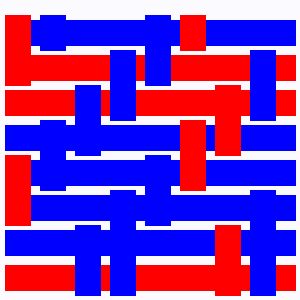

In [15]:
# https://www.tartanregister.gov.uk/docs/Colour_shades.pdf
TartanColours = (
    ('LR', 'Light Red', (0xE8CCB8, 0x878787, 0xEC34C4)),
    ('R', 'Red'),
    ('DR', 'Dark Red'),
    ('O', 'Orange'),
    ('DO', 'Dark Orange'),
    ('LY', 'Light Yellow'),
    ('Y', 'Yellow'),
    ('DY', 'Dark Yellow'),
    ('LG', 'Light Green'),
    ('G', 'Green'),
    ('DG', 'Dark Green'),
    ('LB', 'Light Blue'),
    ('B', 'Blue'),
    ('DB', 'Dark Blue'),
    ('LP', 'Light Purple'),
    ('P', 'Purple'),
    ('DP', 'Dark Purple'),
    ('W', 'White'),
    ('LN', 'Light Grey'),
    ('N', 'Grey'),
    ('DN', 'Dark Grey'),
    ('K', 'Black'),
    ('LT', 'Light Brown'),
    ('T', 'Brown'),
    ('DT', 'Dark Brown'),
)

def tartan_colour_to_html_colour(colour):

    if colour == 'LR':
        return 'lightred'
    elif colour == 'R':
        return 'red'
    elif colour == 'DR':
        return 'darkred'
    elif colour == 'O':
        return 'orange'
    elif colour == 'DO':
        return 'darkorange'
    elif colour == 'LY':
        return 'lightyellow'
    elif colour == 'Y':
        return 'yellow'
    elif colour == 'DY':
        return 'darkyellow'
    elif colour == 'LG':
        return 'lightreen'
    elif colour == 'G':
        return 'green'
    elif colour == 'DG':
        return 'darkreen'
    elif colour == 'LB':
        return 'lightblue'
    elif colour == 'B':
        return 'blue'
    elif colour == 'DB':
        return 'darkblue'
    elif colour == 'LP':
        return 'lightpurple'
    elif colour == 'P':
        return 'purple'
    elif colour == 'DP':
        return 'darkpurple'
    elif colour == 'W':
        return 'white'
    elif colour == 'LN':
        return 'lightgray'
    elif colour == 'N':
        return 'gray'
    elif colour == 'DN':
        return 'darkgray'
    elif colour == 'K':
        return 'black'
    elif colour == 'LT':
        return 'lightbrown'
    elif colour == 'T':
        return 'brown'
    elif colour == 'DT':
        return 'darkbrown'
    else:
        raise TartanException(f'Colour {colour} is not defined')

class TwillHarness: 
    def __init__(self):
        self.state = 0
        self.state_start = 0
        self.is_s = True
        
    def new_weft(self):
        if self.is_s:
            self.state_start = self.dec_state(self.state_start)
        else:
            self.state_start = self.inc_state(self.state_start)
        self.state = self.state_start
    
    def inc_state(self, count):
        count += 1
        if count > 3:
            count = 0
        return count
    
    def dec_state(self, count):
        count -= 1
        if count < 0:
            count = 3
        return count
    
    def create_generator(self):
        while True:  # Change harness
            if self.state == 0:
                yield(False)
            elif self.state == 1:
                yield(False)
            elif self.state == 2:
                yield(True)
            else:
                yield(True)
            self.state = self.inc_state(self.state)
    
class Weaver:
    """ wefts are the shuttle threads and have to be in pairs.  They are synonmous with rows.  Worp
    are the fix threads attached to harnesses that go up and down.  They synonmous with cols."""
    def __init__(self,height=300,width=300):
        self.out = Image.new("RGB", (width, height), (250, 250, 255))
        self.dwg = ImageDraw.Draw(self.out)
        self.height = height
        self.width = width
        self.weft_counter= 0  # Start from bottom and prob up 2
        self.weft_width = 25
        self.weft_gap = 10
        self.worp_width = 25
        self.worp_gap = 10
        self.edge = 5
        self.tartan = Tartan.from_space_threadcount("R1 B2")
        self.twill_harness = TwillHarness()
        
    @property
    def num_wefts(self):
        return int((self.height-self.edge*2) // self.weft_size)

    @property
    def num_worps(self):
        return int((self.width -self.edge*2) // self.worp_size)

    @property
    def weft_size(self):
        return self.weft_width+self.weft_gap

    @property
    def worp_size(self):
        return self.worp_width+self.worp_gap

    def weft_counter_to_y(self):
        return self.height - ((1+self.weft_counter) * self.weft_size)

    def add_weft(self):
        colour = tartan_colour_to_html_colour(next(self.weft_gen))
        x0 = int(self.edge)
        x1 = int(self.width-self.edge)
        y0 = int(self.weft_counter_to_y())
        y1 = int(y0 + self.weft_width)
        self.dwg.rectangle(
            (x0,y0,x1,y1),
            fill=colour,
            width=0)  # Remove stroke="black" as at high resolutions interferes with patterns
                
    def add_worp(self, worp_count):
        colour = tartan_colour_to_html_colour(next(self.worp_gen))
        if next(self.twill_gen): # over
            x0 = int(self.edge + worp_count * self.worp_size)
            x1 = int(x0+self.worp_width)
            y0 = int(self.weft_counter_to_y()-self.weft_gap/2)
            y1 = int(y0 + 0.1+self.weft_size)
            self.dwg.rectangle(
                (x0,y0,x1,y1),
                fill=colour,
                width=0)  # Remove stroke="black" as at high resolutions interferes with patterns
        # else:  # print underneath
        #     self.dwg.add(dwg.rect(
        #         insert=(self.edge + worp_count * self.worp_size,self.weft_counter_to_y()-self.weft_gap/2),
        #         size=(self.worp_width,self.weft_gap/2), fill="black"))
        #     self.dwg.add(dwg.rect(
        #         insert=(self.edge + worp_count * self.worp_size,self.weft_counter_to_y()+self.weft_width),
        #         size=(self.worp_width,self.weft_gap/2), fill="black"))

            
    def weave(self):
        """ Weaving starts for bottom left going up and right """
        self.twill_gen = self.twill_harness.create_generator()
        self.weft_gen = self.tartan.create_generator()
        for i in range(self.num_wefts):
            self.add_weft()
            self.worp_gen = self.tartan.create_generator()  # TODO reset rather than renew
            for j in range(self.num_worps):
                self.add_worp(j)
            self.twill_harness.new_weft()
            self.weft_counter += 1
            
w = Weaver()
# w.tartan = Tartan.from_space_threadcount(test)
w.weave()
w.out.save("/mnt/c/t/tartan.png","PNG")
w.out.show()

In [8]:
print(f"Pattern = {w.tartan}")

Pattern = R14 DB2 R4 DB4 R70 LB4 R4 DB20 R4 G4 R4 G74 R6 DB4 R12 


# Conclusion
To create ca 1000 by 1000 image is getting imprecise and slow ca 1min.  SVG with very large number of threads gets very slow.  

I think bitmap drawing will be much faster, scale better and allow the control. 

For instance as you want to fit large patterns you eventuall get down to a warp thread being only 1 pixel which doesn't really leave space for gaps or complex shading.  It does show the pattern though.

SO planning to redo with Pillow